Install Required CPU Liabrary

In [1]:
pip install tensorflow tensorflow-cpu_count opencv-IPython matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-cpu_count (from versions: none)
ERROR: No matching distribution found for tensorflow-cpu_count


Check For Installed Liabrary

In [2]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.49.0
gast                         0.5.4
google-auth                  2.28.1
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.62.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.29.3
ipython                      8.22.2
jedi                         0.19.1
jupyter_client               8.6.0
j

Check for GPU Avalibality

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

C:\Users\Sumant\AppData\Local\Temp\ipykernel_13116\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Load the Data Collected With Different Format

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\Car\00001.jpg
Issue with image data\Car\00002.jpg
Issue with image data\Car\00003.jpg
Issue with image data\Car\00004.jpg
Issue with image data\Car\00005.jpg
Issue with image data\Car\00006.jpg
Issue with image data\Car\00007.jpg
Issue with image data\Car\00008.jpg
Issue with image data\Car\00009.jpg
Issue with image data\Car\00010.jpg
Issue with image data\Car\00011.jpg
Issue with image data\Car\00012.jpg
Issue with image data\Car\00013.jpg
Issue with image data\Car\00014.jpg
Issue with image data\Car\00015.jpg
Issue with image data\Car\00016.jpg
Issue with image data\Car\00017.jpg
Issue with image data\Car\00018.jpg
Issue with image data\Car\00019.jpg
Issue with image data\Car\00020.jpg
Issue with image data\Car\00021.jpg
Issue with image data\Car\00022.jpg
Issue with image data\Car\00023.jpg
Issue with image data\Car\00024.jpg
Issue with image data\Car\00025.jpg
Issue with image data\Car\00026.jpg
Issue with image data\Car\00027.jpg
Issue with image data\Car\00

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 8322 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

Resize And Rearrange Images in Similar Format

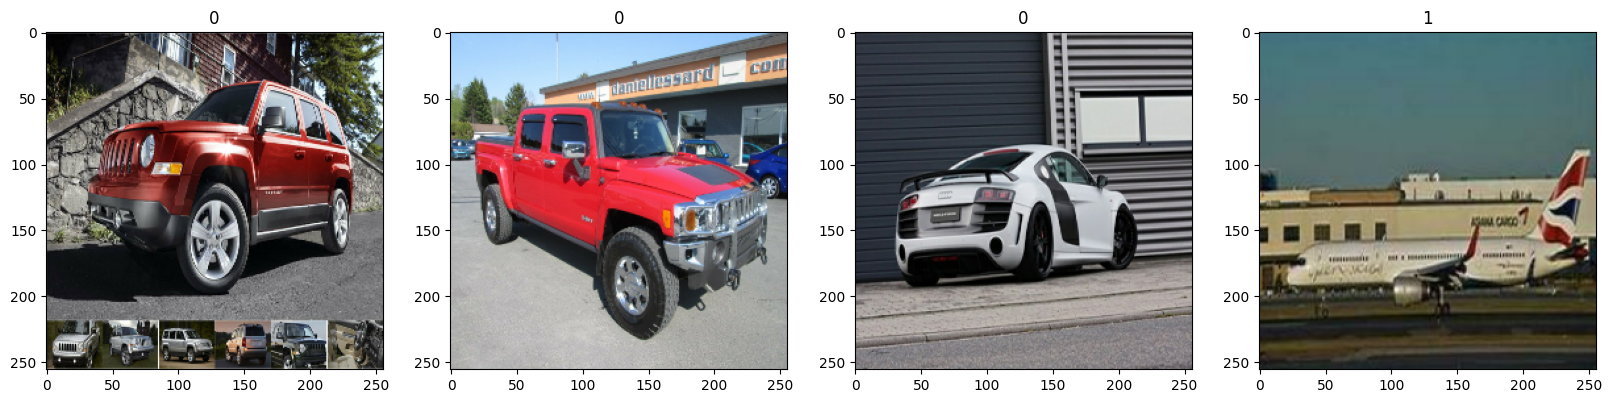

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.8133425 , 0.8878523 , 0.94275427],
          [0.7826019 , 0.8564568 , 0.9113588 ],
          [0.78551626, 0.85545343, 0.9123085 ],
          ...,
          [0.7976256 , 0.86429226, 0.92703736],
          [0.7917394 , 0.8584061 , 0.9211512 ],
          [0.80448455, 0.8711512 , 0.9316176 ]],
 
         [[0.7923522 , 0.87858075, 0.9334827 ],
          [0.7580959 , 0.84432447, 0.8992264 ],
          [0.76499695, 0.8424134 , 0.90612745],
          ...,
          [0.77575064, 0.8424173 , 0.9051624 ],
          [0.77182907, 0.83849573, 0.9012408 ],
          [0.78457415, 0.8512408 , 0.9139591 ]],
 
         [[0.7985447 , 0.88874084, 0.9436428 ],
          [0.7514476 , 0.8399778 , 0.8971737 ],
          [0.74970514, 0.83723575, 0.90131354],
          ...,
          [0.77423406, 0.8409007 , 0.9036458 ],
          [0.77095973, 0.8376264 , 0.9003715 ],
          [0.7837048 , 0.8503715 , 0.9131166 ]],
 
         ...,
 
         [[0.04774433, 0.05950904, 0.07911688],
          [0.04315

Divide The Dataset Into Train, Validate and Test and Set Size of Dataset

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

182

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Creating Squential Model For Trainning

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [9]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Start Trainig Model

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20




182/182 [==============================] - 60s 311ms/step - loss: 0.1082 - accuracy: 0.9794 - val_loss: 0.0722 - val_accuracy: 0.9778
Epoch 2/20
182/182 [==============================] - 59s 318ms/step - loss: 0.0542 - accuracy: 0.9794 - val_loss: 0.0567 - val_accuracy: 0.9808
Epoch 3/20
182/182 [==============================] - 60s 329ms/step - loss: 0.0333 - accuracy: 0.9870 - val_loss: 0.0766 - val_accuracy: 0.9838
Epoch 4/20
182/182 [==============================] - 60s 329ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0478 - val_accuracy: 0.9838
Epoch 5/20
182/182 [==============================] - 59s 321ms/step - loss: 0.0116 - accuracy: 0.9955 - val_loss: 0.1136 - val_accuracy: 0.9868
Epoch 6/20
182/182 [==============================] - 59s 320ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.1032 - val_accuracy: 0.9880
Epoch 7/20
182/182 [==============================] - 58s 315ms/step - loss: 9.4895e-04 - accuracy: 1.0000 - val_loss: 0.1676 - val_accurac

Check for Model Effiency Loss

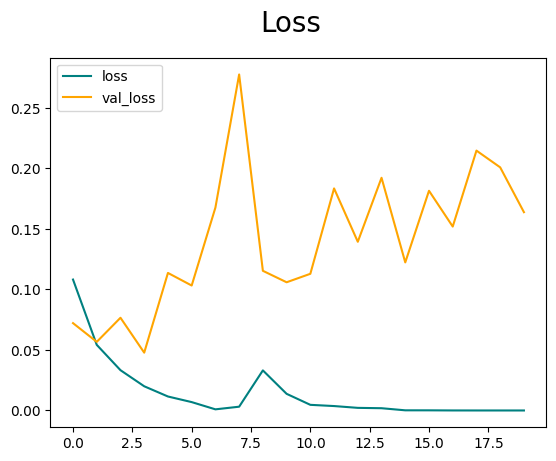

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Check for Model Effiency Accuracy

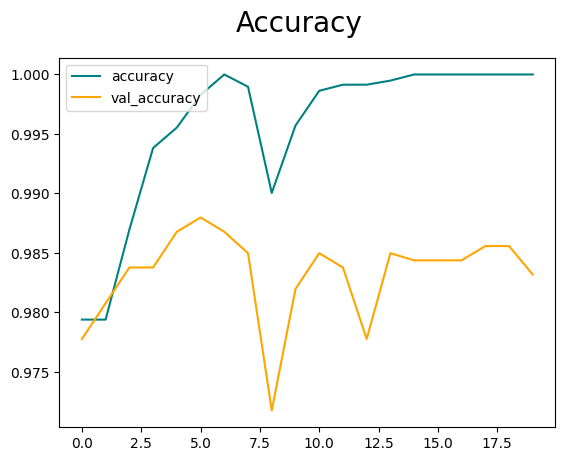

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 115ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.6875, shape=(), dtype=float32) tf.Tensor(0.52380955, shape=(), dtype=float32) tf.Tensor(0.98197114, shape=(), dtype=float32)


In [35]:
import cv2

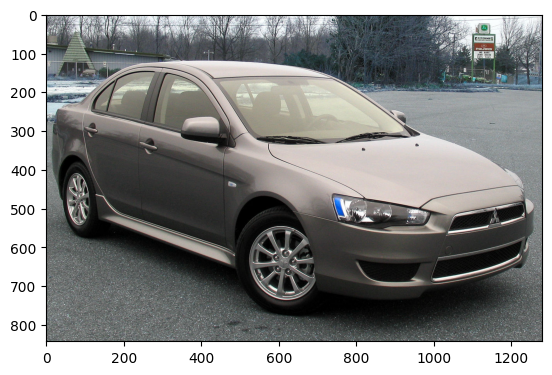

In [60]:
img = cv2.imread('00009.jpg')
plt.imshow(img)
plt.show()

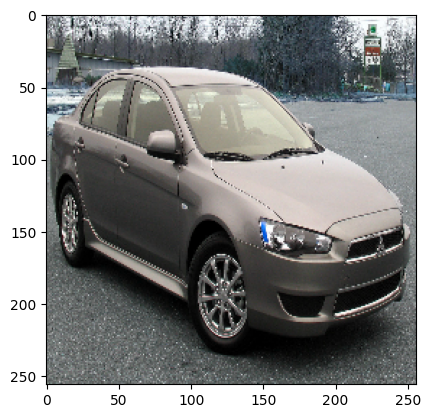

In [61]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [63]:
yhat

array([[1.0989322e-27]], dtype=float32)

Predict the Image 1

In [64]:
if yhat < 0.5: 
    print(f'Predicted class is a Car')
else:
    print(f'Predicted class is Not a Car')

Predicted class is a Car


In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save(os.path.join('models','imageclassifier.h5'))

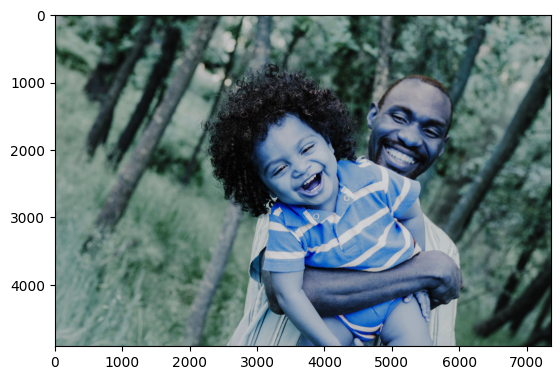

In [66]:
img = cv2.imread('7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg')
plt.imshow(img)
plt.show()

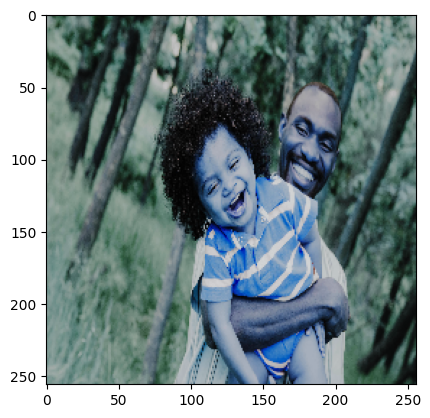

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [69]:
yhat

array([[0.99790937]], dtype=float32)

Predict the Image 2

In [70]:
if yhat < 0.5: 
    print(f'Predicted class is a Car')
else:
    print(f'Predicted class is Not a Car')

Predicted class is Not a Car
